In [145]:
# !wget https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz; tar xf review_polarity.tar.gz;
# !ls txt_sentoken/neg | wc

In [146]:
%pip install nltk==3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [147]:
%pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [148]:
import string
from os import listdir
from os.path import join
from os import listdir
from os.path import isfile, join
from sklearn.datasets import load_files
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.preprocessing import PolynomialFeatures

In [149]:
path = 'txt_sentoken'
folders = [f for f in listdir(path)]
folders

['neg', 'pos']

In [150]:
files = [] #adding the name of the individual classes to our original path
for i in folders:
    all_files = os.path.join(path, i)
    files.append([f for f in listdir(all_files)])

In [151]:
len(files[0])

1000

In [152]:
Y = [] #making a list of all the files in all our individual documents 
for i in folders: 
    all_files = join(path, i)
    num_files = len(listdir(all_files))
    for j in range(num_files):
        Y.append(i)

In [153]:
len(Y)

2000

In [154]:
X = [] #creating a pathway to each individual document
for i in folders:
    file_num = listdir(join(path, i))
    for j in file_num:
        X.append(os.path.join(path,os.path.join(i,j)))

In [155]:
X[1050]

'txt_sentoken/pos/cv586_7543.txt'

In [156]:
for i in range(len(X)):
    f = open(X[i],'r')
    X[i] = f.read()


In [157]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [158]:
def Tolower (x):
    words = []
    words = x.split()
    text = ""
    text = " ".join(word.lower() for word in words)
    return text;

def removeStopWord (x):
    words = []
    words = x.split()
    text = ""
    text = " ".join(word for word in words if word not in stop)
    return text;

st = PorterStemmer()

def stemming (x):
    words = []
    words = x.split()
    text = ""
    text = " ".join([st.stem(word) for word in words])
    return text;

def Lemmit (x):
    words = []
    words = x.split()
    text = ""
    text = " ".join([Word(word).lemmatize() for word in x.split()])
    return text;

In [159]:
for i in range(len(X)):
    X[i] = Tolower(X[i])
    X[i] = removeStopWord(X[i])
    X[i] = stemming(X[i])
    X[i] = Lemmit(X[i])

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
encoder = preprocessing.LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.fit_transform(Y_test)


In [161]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(X)
xtrain_tfidf =  tfidf_vect.transform(X_train)
xvalid_tfidf =  tfidf_vect.transform(X_test)

xtrain_tfidf.data

array([0.06642017, 0.03838612, 0.1225346 , ..., 0.0234762 , 0.07305025,
       0.02172191])

In [162]:
classifier = linear_model.LogisticRegression()
classifier = svm.SVC(kernel="linear")
classifier.fit(xtrain_tfidf, Y_train)
# predict the labels on validation dataset
predictions = classifier.predict(xvalid_tfidf)
accuracy= metrics.accuracy_score(predictions, Y_test)
print ("Accuracy: ", accuracy)

Accuracy:  0.8775


In [163]:
def doTextCleaning(X):
    X= Tolower(str(X))
    X= removeStopWord(X)
    X= stemming(X)
    X= Lemmit(X)

    return X

In [164]:
newReview = """plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no idea what's going on . 
there are dreams , there are characters coming back from the dead , there are others who look like the dead , there are strange apparitions , there are disappearances , there are a looooot of chase scenes , there are tons of weird things that happen , and most of it is simply not explained . 
now i personally don't mind trying to unravel a film every now and then , but when all it does is give me the same clue over and over again , i get kind of fed up after a while , which is this film's biggest problem . 
it's obviously got this big secret to hide , but it seems to want to hide it completely until its final five minutes . 
and do they make things entertaining , thrilling or even engaging , in the meantime ? 
not really . 
the sad part is that the arrow and i both dig on flicks like this , so we actually figured most of it out by the half-way point , so all of the strangeness after that did start to make a little bit of sense , but it still didn't the make the film all that more entertaining . 
i guess the bottom line with movies like this is that you should always make sure that the audience is " into it " even before they are given the secret password to enter your world of understanding . 
i mean , showing melissa sagemiller running away from visions for about 20 minutes throughout the movie is just plain lazy ! ! 
okay , we get it . . . there 
are people chasing her and we don't know who they are . 
do we really need to see it over and over again ? 
how about giving us different scenes offering further insight into all of the strangeness going down in the movie ? 
apparently , the studio took this film away from its director and chopped it up themselves , and it shows . 
there might've been a pretty decent teen mind-fuck movie in here somewhere , but i guess " the suits " decided that turning it into a music video with little edge , would make more sense . 
the actors are pretty good for the most part , although wes bentley just seemed to be playing the exact same character that he did in american beauty , only in a new neighborhood . 
but my biggest kudos go out to sagemiller , who holds her own throughout the entire film , and actually has you feeling her character's unraveling . 
overall , the film doesn't stick because it doesn't entertain , it's confusing , it rarely excites and it feels pretty redundant for most of its runtime , despite a pretty cool ending and explanation to all of the craziness that came before it . 
oh , and by the way , this is not a horror or teen slasher flick . . . it's 
just packaged to look that way because someone is apparently assuming that the genre is still hot with the kids . 
it also wrapped production two years ago and has been sitting on the shelves ever since . 
whatever . . . skip 
it ! 
where's joblo coming from ? 
a nightmare of elm street 3 ( 7/10 ) - blair witch 2 ( 7/10 ) - the crow ( 9/10 ) - the crow : salvation ( 4/10 ) - lost highway ( 10/10 ) - memento ( 10/10 ) - the others ( 9/10 ) - stir of echoes ( 8/10 )"""

def predictNewReview(newReview):
   # newReview = input("Type the Review: ")
    if newReview == '':
        print('Invalid Review')  
    else:
        newReview = str (newReview)
        newReview = doTextCleaning(newReview)
        newReview = tfidf_vect.transform([newReview]).toarray()  
        prediction =  classifier.predict(newReview)
        print(prediction)
        if prediction[0] == 1:
            print( "Positive Review" )
        else:        
            print( "Negative Review")
        return prediction[0]

In [165]:
predictNewReview(newReview)

[0]
Negative Review


0

In [166]:
def makeModel(model):
  model.fit(xtrain_tfidf, Y_train)
  # predict the labels on validation dataset
  predictions = model.predict(xvalid_tfidf)
  predictions[predictions > 0.5] = 1
  predictions[predictions < 0.5] = 0
  accuracy= metrics.accuracy_score(predictions, Y_test)
  print ("Accuracy: ", accuracy)
  return accuracy

In [167]:
lin_svm_acc = makeModel(svm.SVC(kernel="linear"))
lin_acc = makeModel(linear_model.LinearRegression())
logistic_acc = makeModel(linear_model.LogisticRegression())

Accuracy:  0.8775
Accuracy:  0.8425
Accuracy:  0.8625


0.8775
{'LinearSVM': 0.8775, 'Linearregression': 0.8425, 'LogisticRegression': 0.8625}
[87.75, 84.25, 86.25]


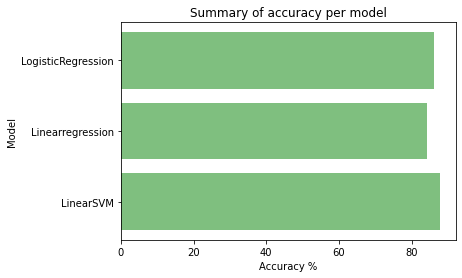

In [168]:
print(lin_svm_acc)
data = {"LinearSVM": lin_svm_acc, "Linearregression": lin_acc, "LogisticRegression": logistic_acc}
print(data)
keys = list(data.keys())
values = [(value * 100) for value in data.values()]
print(values)
plt.barh(keys, values, color ='green', align="center", alpha=0.5)
 
plt.xlabel("Accuracy %")
plt.ylabel("Model")
plt.title("Summary of accuracy per model")
plt.show()